In [31]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sound_analyzer.audio.speaker_identification import test_models, split_dataset
from sound_analyzer.audio.speaker_identification import extract_mfcc

from sound_analyzer.audio.util import track_info

## Example of MFCC extraction

D:\Devel\Repos\PycharmProjects\SoundAnalyzer\sound_analyzer\audio\mfcc.py:43: RuntimeWarning: divide by zero encountered in log10
  frames_energies = np.log10(np.dot(power_spectrum, filter_bank.T))


(32, 20)

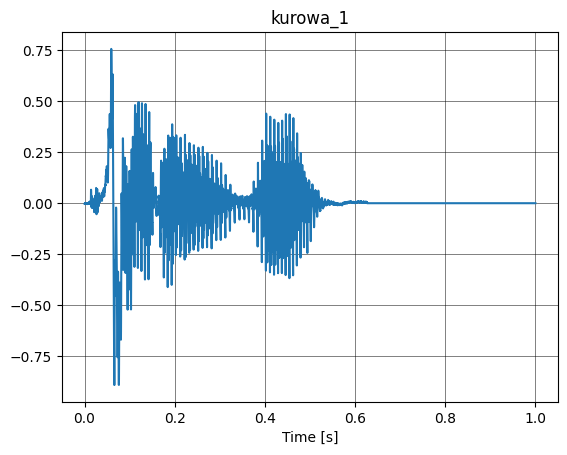

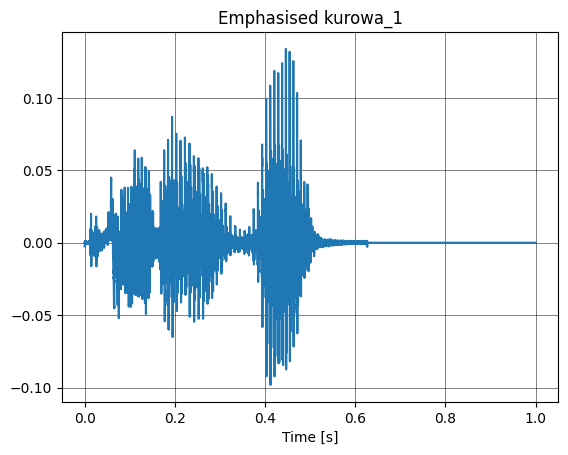

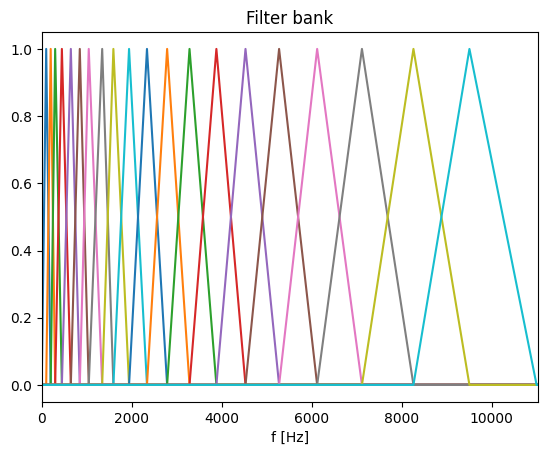

In [32]:
mfcc_kurowa = extract_mfcc(r'D:\MINI\magisterka\AiPD\projekt1\1_04\Znormalizowane\kurowa_1.wav', show_plots = True)
mfcc_kurowa.shape

# Dataset preparation

In [33]:
DATA_PATH = Path(r'D:\MINI\magisterka\AiPD\projekt3\data')
MAX_SPEAKERS = None

In [34]:
rec_paths = list(DATA_PATH.rglob('**/Znormalizowane/*.wav'))
lengths, sample_rates = zip(*[track_info(path) for path in rec_paths])
dataset = pd.DataFrame(data = {
	'path': [path.as_posix() for path in rec_paths],
	'content': [path.stem[:-2] for path in rec_paths],
	'speaker': [path.parent.parent.stem for path in rec_paths],
	'n_sampels': lengths,
	'sample_rate': sample_rates
})
dataset

,path,content,speaker,n_sampels,sample_rate
0,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,15161,22050
1,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,15900,22050
2,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,14052,22050
3,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,abe,1_01,15345,22050
4,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,abe,1_01,12758,22050
...,...,...,...,...,...
3559,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛uk,5_13,11718,22050
3560,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛uk,5_13,12460,22050
3561,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛óêå,5_13,12904,22050
3562,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛óêå,5_13,15426,22050


In [35]:
sel_idx = (dataset['sample_rate'] == 22050) & (dataset['n_sampels'] <= 22050) & (dataset['n_sampels'] > 5000)
dataset = dataset[sel_idx]
dataset

,path,content,speaker,n_sampels,sample_rate
0,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,15161,22050
1,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,15900,22050
2,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,14052,22050
3,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,abe,1_01,15345,22050
4,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,abe,1_01,12758,22050
...,...,...,...,...,...
3559,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛uk,5_13,11718,22050
3560,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛uk,5_13,12460,22050
3561,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛óêå,5_13,12904,22050
3562,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛óêå,5_13,15426,22050


In [36]:
speaker_samples_df = dataset[['path', 'speaker']].groupby('speaker').count()
speaker_samples_df = speaker_samples_df.reset_index().rename(columns = { 'path': 'n_samples' })
speaker_samples_df.sort_values(by = 'n_samples')

,speaker,n_samples
3,1_06,41
27,5_03,78
9,2_06,87
14,2_11,89
24,4_10,92
11,2_08,101
25,4_11,101
4,1_08,102
18,3_01,102
7,2_04,104


In [37]:
sel_speakers = list(speaker_samples_df.loc[speaker_samples_df['n_samples'] >= 100, 'speaker'])
if MAX_SPEAKERS and MAX_SPEAKERS < len(sel_speakers):
	sel_speakers = sel_speakers[:MAX_SPEAKERS]
print(f'Selecting {len(sel_speakers)} with at least 100 samples')
dataset = dataset[dataset['speaker'].isin(sel_speakers)]
dataset = dataset.reset_index()
dataset

Selecting 24 with at least 100 samples


,index,path,content,speaker,n_sampels,sample_rate
0,0,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,15161,22050
1,1,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,15900,22050
2,2,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,aba,1_01,14052,22050
3,3,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,abe,1_01,15345,22050
4,4,D:/MINI/magisterka/AiPD/projekt3/data/1_01/Zno...,abe,1_01,12758,22050
...,...,...,...,...,...,...
2539,3559,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛uk,5_13,11718,22050
2540,3560,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛uk,5_13,12460,22050
2541,3561,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛óêå,5_13,12904,22050
2542,3562,D:/MINI/magisterka/AiPD/projekt3/data/5_13/Zno...,╛óêå,5_13,15426,22050


## MFCC extraction

### MFCC 2-13

In [38]:
mfcc = dataset.apply(
	lambda row: extract_mfcc(row['path'])[:, 1:13].reshape(-1),
	axis = 'columns', result_type = 'expand'
)
mfcc = mfcc.fillna(0.0)
mfcc = StandardScaler().fit_transform(mfcc)
mfcc

D:\Devel\Repos\PycharmProjects\SoundAnalyzer\sound_analyzer\audio\mfcc.py:43: RuntimeWarning: divide by zero encountered in log10
  frames_energies = np.log10(np.dot(power_spectrum, filter_bank.T))


array([[ 0.25321663,  0.26512027,  0.13852932, ..., -0.02621421,
        -0.0781325 , -0.01685316],
       [ 0.17476721,  1.09110819,  0.15442428, ..., -0.02621421,
        -0.0781325 , -0.01685316],
       [ 0.40837941,  1.08383018,  0.54830928, ..., -0.02621421,
        -0.0781325 , -0.01685316],
       ...,
       [-0.15309953,  0.07234818,  1.14723727, ..., -0.02621421,
        -0.0781325 , -0.01685316],
       [-0.16830783, -0.74699353, -0.02943824, ..., -0.02621421,
        -0.0781325 , -0.01685316],
       [-0.2930876 , -0.28922884,  0.05548623, ..., -0.02621421,
        -0.0781325 , -0.01685316]])

### MFCC 2-13 with frame energy logarithm

In [39]:
features_idx = np.append(np.arange(1, 13), -1)
mfcc_with_energy = dataset.apply(
	lambda row: extract_mfcc(row['path'], include_energy = True)[:, features_idx].reshape(-1),
	axis = 'columns', result_type = 'expand'
)
mfcc_with_energy = mfcc_with_energy.replace([-np.inf, np.inf], np.NaN)
mfcc_with_energy = mfcc_with_energy.fillna(0.0)
mfcc_with_energy = StandardScaler().fit_transform(mfcc_with_energy)
mfcc_with_energy

D:\Devel\Repos\PycharmProjects\SoundAnalyzer\sound_analyzer\audio\mfcc.py:43: RuntimeWarning: divide by zero encountered in log10
  frames_energies = np.log10(np.dot(power_spectrum, filter_bank.T))
D:\Devel\Repos\PycharmProjects\SoundAnalyzer\sound_analyzer\audio\speaker_identification.py:38: RuntimeWarning: divide by zero encountered in log10
  energy = np.log10(np.sum(frame_sq, axis = 1, keepdims = True))


array([[ 0.25321663,  0.26512027,  0.13852932, ..., -0.0781325 ,
        -0.01685316,  0.13894788],
       [ 0.17476721,  1.09110819,  0.15442428, ..., -0.0781325 ,
        -0.01685316,  0.13894788],
       [ 0.40837941,  1.08383018,  0.54830928, ..., -0.0781325 ,
        -0.01685316,  0.13894788],
       ...,
       [-0.15309953,  0.07234818,  1.14723727, ..., -0.0781325 ,
        -0.01685316,  0.13894788],
       [-0.16830783, -0.74699353, -0.02943824, ..., -0.0781325 ,
        -0.01685316,  0.13894788],
       [-0.2930876 , -0.28922884,  0.05548623, ..., -0.0781325 ,
        -0.01685316,  0.13894788]])

# Experiments

## MFCC 2-13

### Random train-test split

Train dataset size: 2035
Test dataset size: 509
Training and testing Random forest...
Random forest accuracy = 0.6974459724950884
Training and testing SVM...
SVM accuracy = 0.8290766208251473
Training and testing MLP...
MLP accuracy = 0.8506876227897839


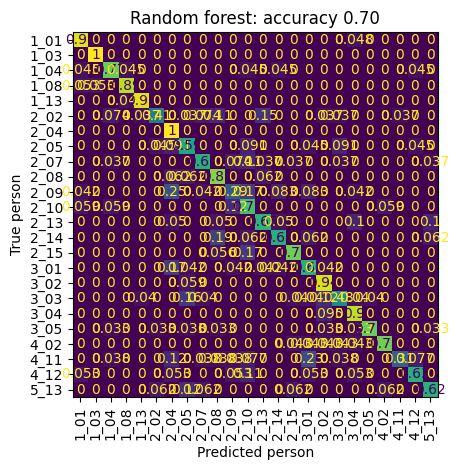

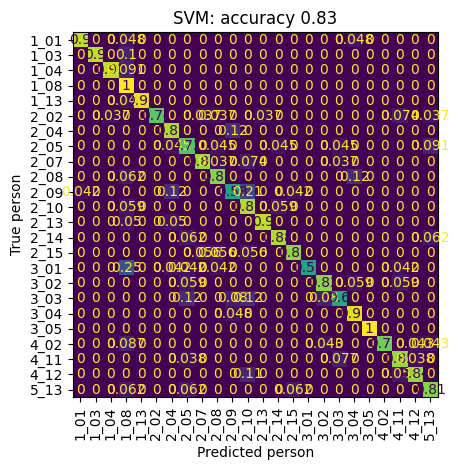

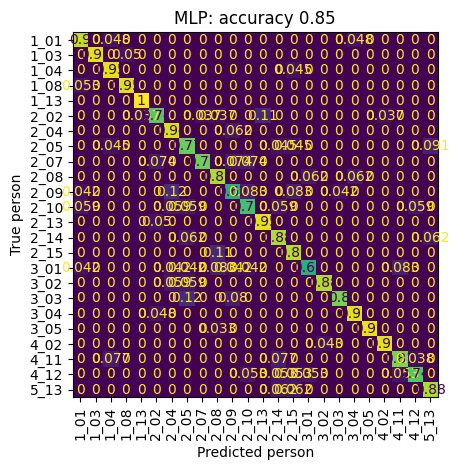

In [40]:
x_train, x_test, y_train, y_test = split_dataset(dataset, mfcc)
print(f'Train dataset size: {x_train.shape[0]}')
print(f'Test dataset size: {x_test.shape[0]}')
test_models(x_train, x_test, y_train, y_test, labels = sel_speakers)

### Unknown words in test dataset

Train dataset size: 2043
Test dataset size: 501
Training and testing Random forest...
Random forest accuracy = 0.5349301397205589
Training and testing SVM...
SVM accuracy = 0.6327345309381237
Training and testing MLP...
MLP accuracy = 0.6327345309381237


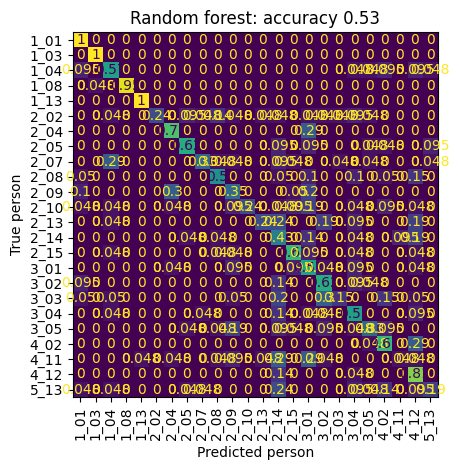

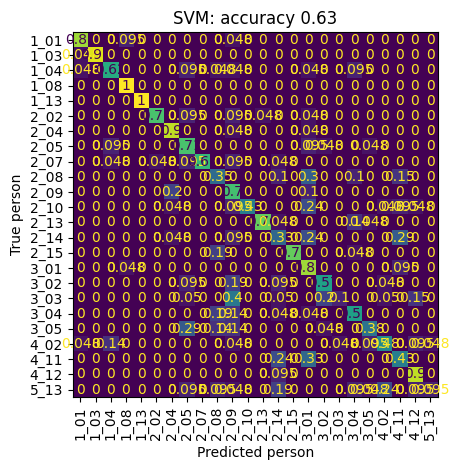

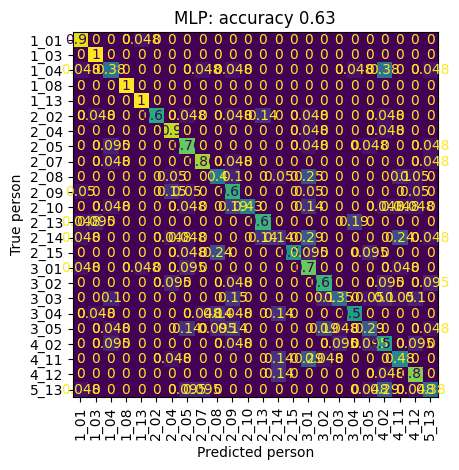

In [41]:
x_train, x_test, y_train, y_test = split_dataset(dataset, mfcc, method = 'separate')
print(f'Train dataset size: {x_train.shape[0]}')
print(f'Test dataset size: {x_test.shape[0]}')
test_models(x_train, x_test, y_train, y_test, labels = sel_speakers)

### Known words in test dataset

Train dataset size: 2016
Test dataset size: 528
Training and testing Random forest...
Random forest accuracy = 0.8125
Training and testing SVM...
SVM accuracy = 0.8825757575757576
Training and testing MLP...
MLP accuracy = 0.9242424242424242


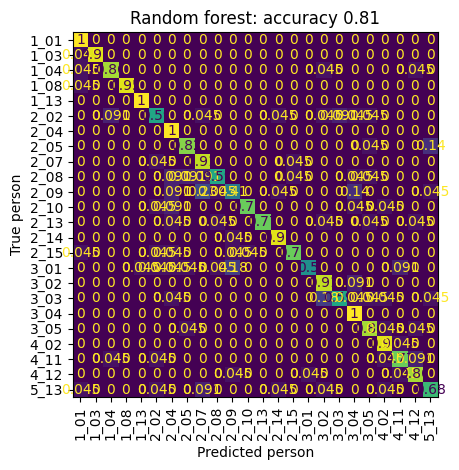

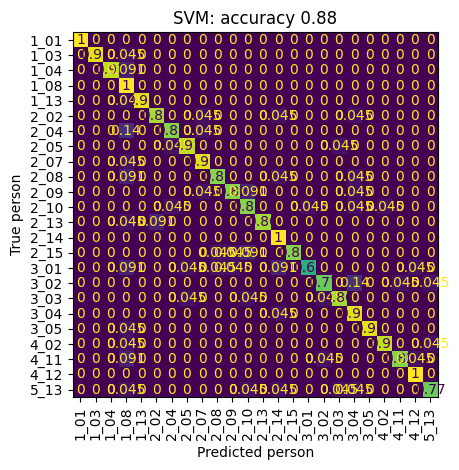

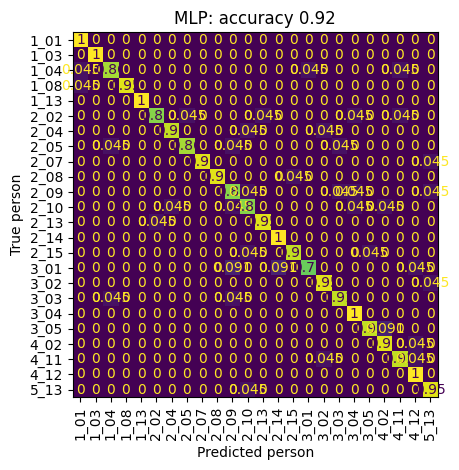

In [42]:
x_train, x_test, y_train, y_test = split_dataset(dataset, mfcc, method = 'shared')
print(f'Train dataset size: {x_train.shape[0]}')
print(f'Test dataset size: {x_test.shape[0]}')
test_models(x_train, x_test, y_train, y_test, labels = sel_speakers)

## MFCC 2-13 and frame energy logarithm

### Random train-test split

Train dataset size: 2035
Test dataset size: 509
Training and testing Random forest...
Random forest accuracy = 0.8565815324165029
Training and testing SVM...
SVM accuracy = 0.8781925343811395
Training and testing MLP...
MLP accuracy = 0.9194499017681729


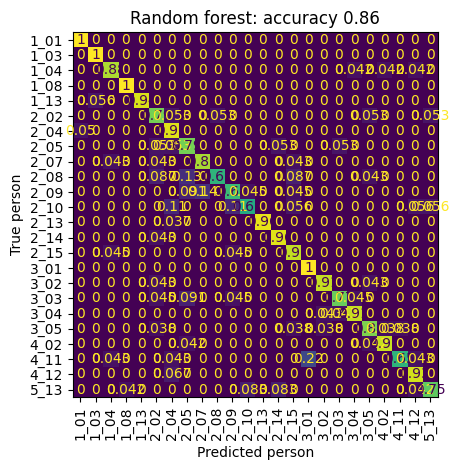

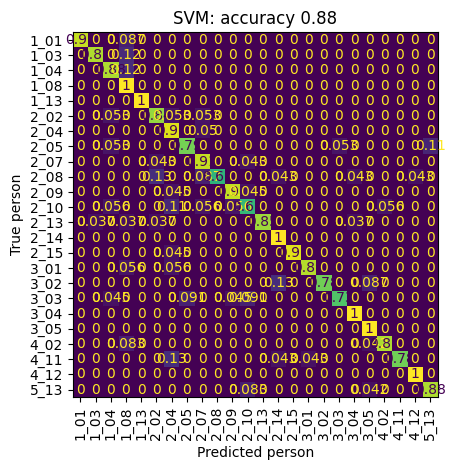

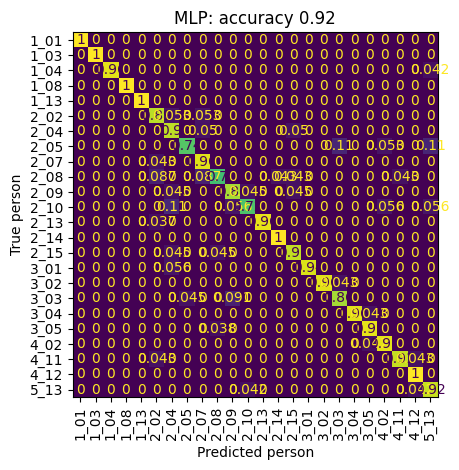

In [43]:
x_train, x_test, y_train, y_test = split_dataset(dataset, mfcc_with_energy)
print(f'Train dataset size: {x_train.shape[0]}')
print(f'Test dataset size: {x_test.shape[0]}')
test_models(x_train, x_test, y_train, y_test, labels = sel_speakers)

### Unknown words in test dataset

Train dataset size: 2043
Test dataset size: 501
Training and testing Random forest...
Random forest accuracy = 0.6367265469061876
Training and testing SVM...
SVM accuracy = 0.7025948103792415
Training and testing MLP...
MLP accuracy = 0.6846307385229541


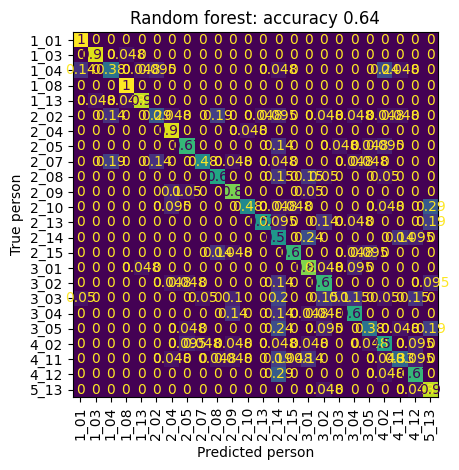

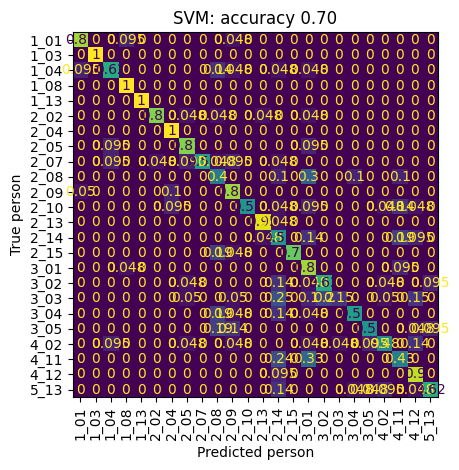

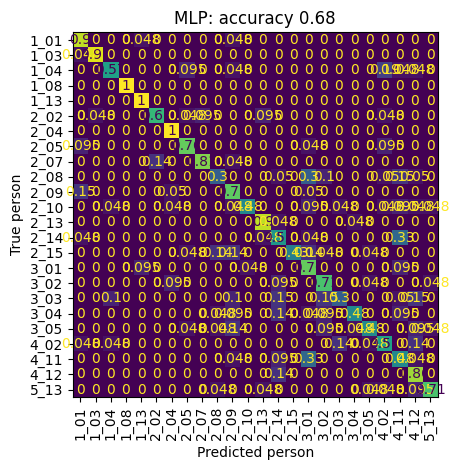

In [44]:
x_train, x_test, y_train, y_test = split_dataset(dataset, mfcc_with_energy, method = 'separate')
print(f'Train dataset size: {x_train.shape[0]}')
print(f'Test dataset size: {x_test.shape[0]}')
test_models(x_train, x_test, y_train, y_test, labels = sel_speakers)

### Known words in test dataset

Train dataset size: 2016
Test dataset size: 528
Training and testing Random forest...
Random forest accuracy = 0.884469696969697
Training and testing SVM...
SVM accuracy = 0.9128787878787878
Training and testing MLP...
MLP accuracy = 0.928030303030303


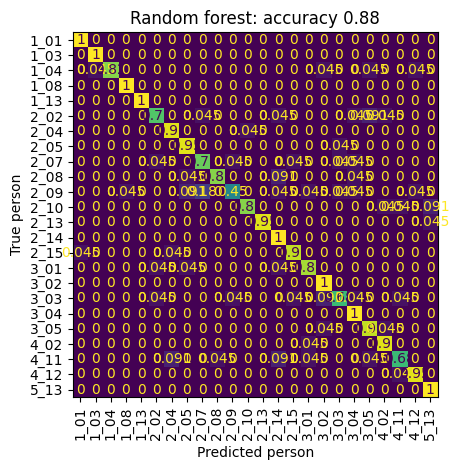

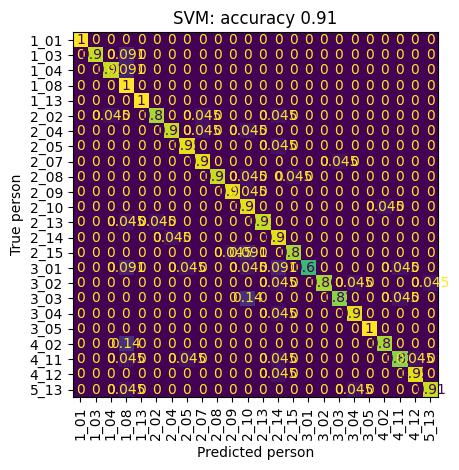

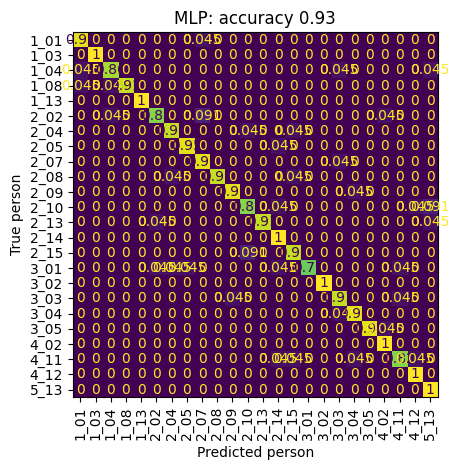

In [45]:
x_train, x_test, y_train, y_test = split_dataset(dataset, mfcc_with_energy, method = 'shared')
print(f'Train dataset size: {x_train.shape[0]}')
print(f'Test dataset size: {x_test.shape[0]}')
test_models(x_train, x_test, y_train, y_test, labels = sel_speakers)